## HW_1 CPS_584_M2

### Pratham Ramkripal Yadav   1017895120 
### Jenil Sanjaykumar Pandya 1017921730
 


#### This code block imports essential libraries for numerical operations, plotting, interactive display, and time handling.

In [1]:
# Importing necessary libraries
import numpy as np  # Numerical operations with NumPy
import matplotlib.pyplot as plt  # Plotting with Matplotlib
from matplotlib import cm  # Colormap for color maps
from IPython import display  # Interactive display in IPython
import time  # Adding delays or timestamps with Time


####  This block defines input arrays, initializes random weights and bias, sets learning rate and max iterations, and creates an array for plotting lines.

In [2]:
# Input arrays
x1 = np.array([0, 0, 1, 3, 2, 2])
x2 = np.array([0, 1, 0, 3, 2, 3])
# Output array
t = np.array([0, 0, 0, 1, 1, 1])

# Random weights and bias initialization
w1, w2, w = np.random.uniform(-3.0, 3.0), np.random.uniform(-3.0, 3.0), np.random.uniform(-3.0, 3.0)

learning_rate, max_iterations = 0.5, 1000
k = np.linspace(-4, 4, num=100)
lines = []  # List to store lines for plotting


## QUESTION 1

#### creates a scatter plot with two classes (Class 1 and Class 0) on the x-y plane, using blue circles and red squares, and adds labels and a legend for clarity.

#### defines the sigmoid function and implements a loop for gradient descent, updating weights based on the error calculated for each data point. The loop breaks if the total error is low enough (<= 0.1).

#### updates and plots the classification lines based on the calculated weights. It uses a dashed green line for intermediate steps and a solid blue line for the final classification line. The plot is dynamically displayed and updated during the iterations.


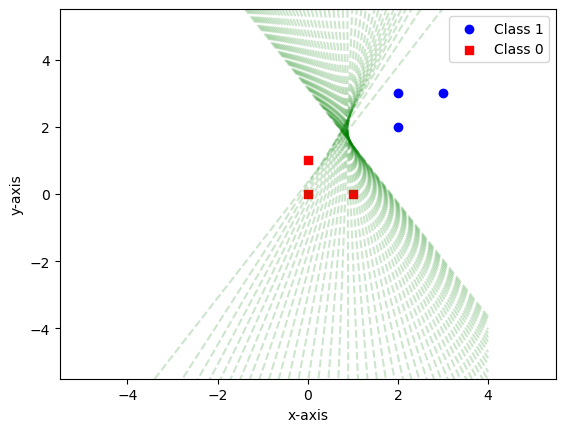

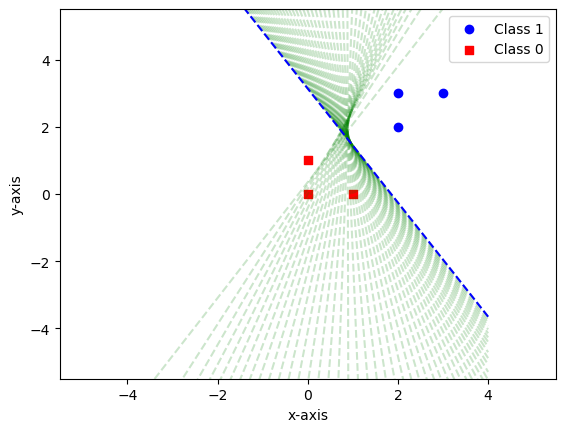

In [3]:
# Creating a scatter plot with blue circles (Class 1) and red squares (Class 0)
fig, ax = plt.subplots()
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.axis([-5.5, 5.5, -5.5, 5.5])
ax.scatter(x1[t == 1], x2[t == 1], c='blue', marker='o', label='Class 1')
ax.scatter(x1[t == 0], x2[t == 0], c='red', marker='s', label='Class 0')
ax.legend()

# Sigmoid function definition
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# Loop for gradient descent and plotting classification lines
for _ in range(max_iterations):
    error = 0
    
    # Loop for calculating error and updating weights
    for i in range(len(x1)):
        u = (w1 * x1[i]) + (w2 * x2[i]) + w
        o = sigmoid(u)
        error += (o - t[i])**2
        dw1 = learning_rate * (x1[i] * (o - t[i]) * (o * (1 - o)))
        dw2 = learning_rate * (x2[i] * (o - t[i]) * (o * (1 - o)))
        dw = learning_rate * ((o - t[i]) * (o * (1 - o)))
        w1 -= dw1
        w2 -= dw2
        w -= dw
    
    # Break loop if error is low
    if error <= 0.1:
        break
    
    # Update and plot classification lines
    if w2 != 0:
        l = ((-w1 * k) - w) / w2
    line, = ax.plot(k, l, linestyle='--', c='g', alpha=0.2)
    lines.append(line)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

# Plotting the final classification line
ax.plot(k, l, c='b', linestyle='--', alpha=1)
plt.show()


## QUESTION 2

#### This block defines input arrays, initializes random weights and bias for a 3D classification, sets learning rate and max iterations, and creates arrays for plotting planes.

In [4]:
# Input arrays
x1 = np.array([0, 0, 1, 3, 2, 2])
x2 = np.array([0, 1, 0, 3, 2, 3])
x3 = np.array([0, 0, 0, 3, 3, 2])
# Output array
t = np.array([0, 0, 0, 1, 1, 1])

# Random weights and bias initialization
w1, w2, w3, w = np.random.uniform(-3.0, 3.0), np.random.uniform(-3.0, 3.0), np.random.uniform(-3.0, 3.0), np.random.uniform(-3.0, 3.0)

learning_rate, max_iterations = 0.5, 1000
k1, k2 = np.linspace(-4, 4, num=100), np.linspace(-4, 4, num=100)
k1_grid, k2_grid = np.meshgrid(range(-4, 4), range(-4, 4))
planes = []  # List to store planes for plotting


#### This block creates a 3D scatter plot with blue circles representing Class 1 and red squares representing Class 0 in a 3D space defined by X1, X2, and X3. Axes labels are set, and a legend is added for clarity.

#### defines the sigmoid function and implements a loop for gradient descent in a 3D space, updating weights based on the error calculated for each data point. The loop breaks if the total error is low enough (<= 0.01).

#### updates and plots the classification planes based on the calculated weights in a 3D space. It uses a translucent surface for intermediate steps and a solid red surface for the final classification plane. The plot is dynamically displayed and updated during the iterations.

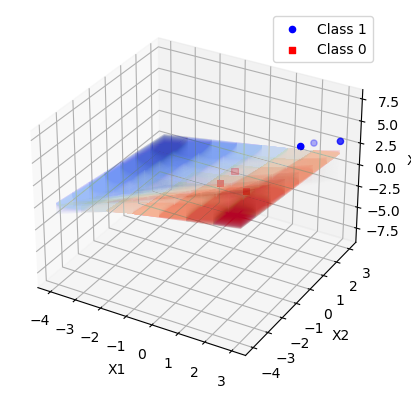

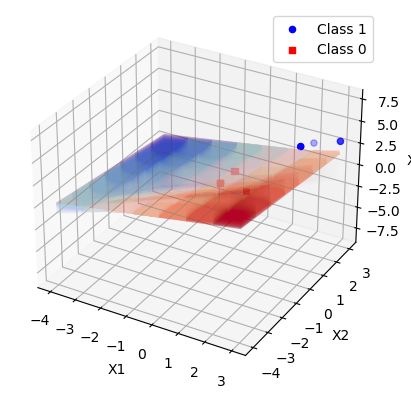

In [5]:
# Creating a 3D scatter plot with blue circles (Class 1) and red squares (Class 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.scatter(x1[t == 1], x2[t == 1], x3[t == 1], c='blue', marker='o', label='Class 1', cmap='bwr')
ax.scatter(x1[t == 0], x2[t == 0], x3[t == 0], c='red', marker='s', label='Class 0', cmap='bwr')
ax.legend()

# Sigmoid function definition
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# Loop for gradient descent and plotting classification planes
for _ in range(max_iterations):
    error = 0
    
    # Loop for calculating error and updating weights
    for i in range(len(x1)):
        u = (w1 * x1[i]) + (w2 * x2[i]) + (w3 * x3[i]) + w
        o = sigmoid(u)
        error += (o - t[i])**2
        dw1 = learning_rate * (x1[i] * (o - t[i]) * (o * (1 - o)))
        dw2 = learning_rate * (x2[i] * (o - t[i]) * (o * (1 - o)))
        dw3 = learning_rate * (x3[i] * (o - t[i]) * (o * (1 - o)))
        dw = learning_rate * ((o - t[i]) * (o * (1 - o)))
        w1 -= dw1
        w2 -= dw2
        w3 -= dw3
        w -= dw
    
    # Break loop if error is low
    if error <= 0.01:
        break
    
    # Update and plot classification planes
    if w3 != 0:
        k3 = -((w1 * k1_grid + w2 * k2_grid + w) / w3)
    plane = ax.plot_surface(k1_grid, k2_grid, k3, alpha=0.01, cmap=cm.coolwarm)
    planes.append(plane)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

# Plotting the final classification plane
ax.plot_surface(k1_grid, k2_grid, k3, alpha=0.2, color='red')
plt.show()
